# MAC0318 Introdu√ß√£o √† Programa√ß√£o de Rob√¥s M√≥veis

## Aprendizado supervisionado

Um **problema de aprendizado supervisionado** consiste de:

- Um conjunto de dados de entrada sa√≠da $\{(x_1,y_1),\ldots,(x_N,y_N)\}$.
- Uma classe de hip√≥teses $y=f(x) \in \mathcal{H}$; em geral assumimos que $y_i = f(x_i) + \epsilon$, onde $\epsilon$ √© um *ru√≠do*.
- Fun√ß√£o de avalia√ß√£o $J(f): \mathcal{H} \rightarrow \mathbb{R}$

Uma solu√ß√£o para o problema consiste de um **algoritmo de aprendizado** que recebe um conjunto de dados e a fun√ß√£o de avalia√ß√£o e devolve uma fun√ß√£o da classe de hip√≥teses.

## Regressor linear simples

Um dos problemas mais simples de aprendizado supervisionado √© o problema de regress√£o linear simples. Para esse problema temos

- Sa√≠da unidimensional $y_i \in \mathbb{R}$
- Classe de hip√≥tese de func√µes lineares $\mathcal{H} = \{ f(x) = b + w^t \cdot x  \mid b \in \mathbb{R}, w \in \mathbb{R}^{d} \}$
- Fun√ß√£o de avalia√ß√£o quadr√°tica $J(f) = \frac{1}{2N}\sum_{i=1}^N (y_i - f(x_i))^2$

Considere primeiro o exemplo visto em aula, cujos dados de entrada $x_i$ s√£o unidimensionais.

In [1]:
# Vamos come√ßar carregando algumas bibliotecas necess√°rias

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Dados de treino

In [2]:
# Entrada
x = np.array([1, 2, 2.5, 3, 3.5, 4.5, 4.7, 5.2, 6.1, 6.1, 6.8])

# Sa√≠da
y = np.array([1.5, 1, 2, 2, 3.7, 3, 5, 4, 5.8, 5, 5.7])

# Tamanho do conjunto (quantidade de inst√¢ncias/exemplos)
N = len(x)

Vamos "ver" os dados

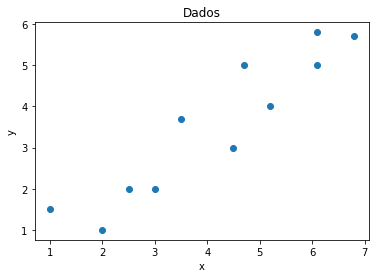

In [3]:
# Gr√°fico de dispers√£o
plt.scatter(x,y);
# T√≠tulo
plt.title("Dados");
# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");
# plt.savefig("dados.png") # Descomente se quiser salvar a imagem

### Classe de hip√≥teses

Fun√ß√µes lineares: $f(x) = b + wx$; $b$ √© conhecido como vi√©s ou intercepto (*bias*) e $w$ como peso ou coeficiente de regress√£o (*slope*). 

In [4]:
H = lambda b,w: lambda x: b + w*x

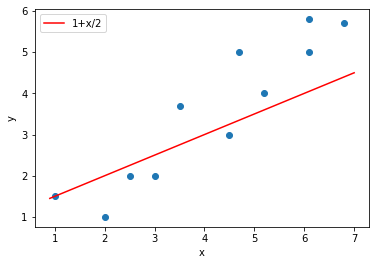

In [147]:
# Exemplo de hip√≥tese: 1 + x/2
f_ex = H(1,.5)

# Dom√≠nio
X = np.linspace(0.9,7,2)

# Exibir fun√ß√£o
plt.plot(X,f_ex(X),c="r",label="1+x/2")
plt.legend()

# Exibir dados
plt.scatter(x,y);

# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");

### Fun√ß√£o de avalia√ß√£o

Erro quadr√°tico m√©dio

In [157]:
J = lambda f: 0.5*np.sum((f(x)-y)**2)/N

In [158]:
J(f_ex)

0.4915909090909091

Vamos visualiz√°-la como curvas de n√≠vel

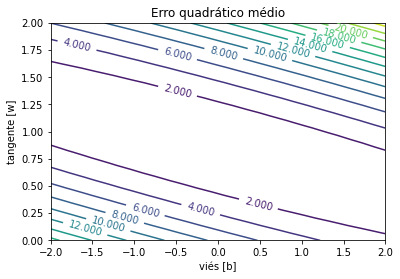

In [8]:
B,W = np.meshgrid(np.linspace(-2,2,30),np.linspace(0,2,30)) # Espa√ßo param√©trico

V = np.zeros(B.shape)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        V[i,j] = J(H(B[i,j], W[i,j]))

fig, ax = plt.subplots();
CS = ax.contour(B, W, V, 15);
ax.clabel(CS, inline=True, fontsize=10);
ax.set_xlabel('vi√©s [b]');
ax.set_ylabel('tangente [w]');
ax.set_title('Erro quadr√°tico m√©dio');

Vamos gerar algumas fun√ß√µes na classe de hip√≥tese e analis√°-las em rela√ß√£o ao custo

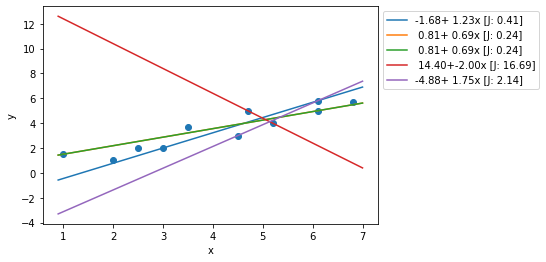

In [151]:
fig, ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")

X = np.linspace(0.9,7,2)

for _ in range(5):
    # Selecionamos dois pontos quaisquer de treino
    i = np.random.randint(0, N-1, 2)
    # E calculamos reta que passa por eles
    w = (y[i[0]] - y[i[1]])/(x[i[0]]-x[i[1]])
    b = y[i[0]] - w*x[i[0]]
    # Fun√ß√£o linear correspondente
    f = H(b,w)
    # Avalia√ß√£o
    loss = J(f)
    # Exibir no gr√°fico
    plt.plot(X,f(X),label=f"{float(b): 3.2f}+{float(w): 3.2f}x [J: {loss:.2f}]")

# Mostrar dados para compara√ß√£o
plt.scatter(x,y);
plt.legend(bbox_to_anchor=(1,1), loc="upper left");

### Algoritmo de aprendizado

#### Descida do gradiente

Encontra m√≠nimo local de uma fun√ß√£o diferenci√°vel $J(w)$, parametrizada por vetor $w$, na vizinhan√ßa da solu√ß√£o inicial $w^{(0)}$ seguindo a cada passo a dire√ß√£o de maior "inclina√ß√£o", dada pelo gradiente $\nabla J(w)$:


&nbsp;&nbsp;&nbsp; 1: &nbsp; Escolha solu√ß√£o inicial $w^{(0)}$ <br>
&nbsp;&nbsp;&nbsp;    2: &nbsp; <b>para</b> k = 0, 1, 2, ... <b>fa√ßa</b> <br>
&nbsp;&nbsp;&nbsp;    3:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $g^{(k)}$ = $\nabla J(w^{(k)})$ <br>
&nbsp;&nbsp;&nbsp;    4:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; escolha $\eta_k$ que minimize $J(w^{(k)}-\eta_k g^{(k)})$ <br>
&nbsp;&nbsp;&nbsp;    5:   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $w^{(k+1)} = w^{(k)} - \eta_k g^{(k)}$ <br>


Na pr√°tica o passo 4 √© realizado escolhendo $\eta_k$ atrav√©s de uma heur√≠stica.

### Gradiente de erro quadr√°tico m√©dio para fun√ß√£o linear

Para $f(x)=b+wx$ e $J(f)=\frac{1}{2N}\sum_i (f(x)-y_i)^2$. O gradiente de $J$ em rela√ß√£o aos par√¢metros √© dado por:

$$
\nabla J (b,w) = \begin{bmatrix} \frac{\partial J(b+wx)}{\partial b} \\ \frac{\partial J(b+wx)}{\partial w} \end{bmatrix} = \frac{1}{N} \begin{bmatrix} \sum_{i=1}^N (f(x_i)-y_i) \\ \sum_{i=1}^N (f(x_i)-y_i)x_i \end{bmatrix}
$$

In [10]:
# Fun√ß√£o de gradiente para hip√≥tese linear

grad_J = lambda b, w: np.array([np.sum(b+w*x-y), np.sum((b+w*x-y)*x)/N])

In [11]:
# Gradiente de f(x) = 1 + x/2

grad_J(1.0, 0.5)

array([-5.  , -3.02])

Vamos tentar visualizar o gradiente $\nabla J: \mathbb{R}^2 \rightarrow \mathbb{R}^2$.

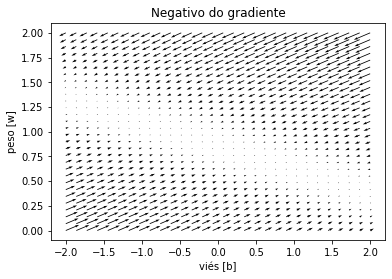

In [12]:
B,W = np.meshgrid(np.linspace(-2,2,30),np.linspace(0,2,30)) # Espa√ßo param√©trico

U, V = np.zeros(B.shape), np.zeros(B.shape)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        g = grad_J(B[i,j], W[i,j])
        U[i,j] = -g[0]
        V[i,j] = -g[1]

plt.xlabel('vi√©s [b]')
plt.ylabel('peso [w]')
plt.title('Negativo do gradiente')

plt.quiver(B,W,U,V); 

### Otimiza√ß√£o

Vamos encontrar a fun√ß√£o √≥tima por meio da descida do gradiente

In [13]:
w = 10*np.random.rand(2) # inicializa√ß√£o arbitr√°ria dos par√¢metros

k = 0   # no. de √©pocas

a = 0.01 # taxa de aprendizado (vamos usar um valor constante por simplicidade)


g = grad_J(w[0],w[1])

w_list, J_list = [w[:]], [J(H(w[0],w[1]))] # para exibir depois


while np.linalg.norm(g) > 1e-3:
    w -= a*g
    g = grad_J(w[0],w[1])
    w_list.append(w[:])
    J_list.append(J(H(w[0],w[1])))
    k = k + 1
    if k >= 500: # no. m√°ximo de √©pocas
        break
print("M√≠nimo local em:", w)
print("Norma do gradiente:", np.linalg.norm(grad_J(w[0],w[1])))
print("N√∫mero de √©pocas:", k)

M√≠nimo local em: [-0.02570468  0.85856871]
Norma do gradiente: 0.0038184274750088674
N√∫mero de √©pocas: 500


Vamos inspecionar o progresso do aprendizado por √©poca

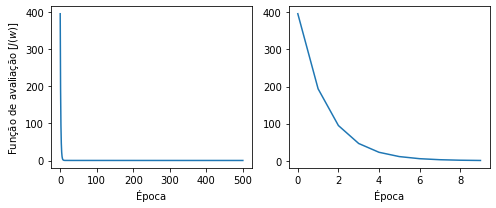

In [14]:
fig, ax = plt.subplots(1,2,figsize=(7,3))
# Para todas as √©pocas
ax[0].plot(J_list);
ax[0].set_ylabel('Fun√ß√£o de avalia√ß√£o [$J(w)$]')
ax[0].set_xlabel('√âpoca')
# Apenas para primeiras 10 √©pocas
ax[1].plot(J_list[:10]);
ax[1].set_xlabel('√âpoca')
plt.tight_layout()

Como √© poss√≠vel observar, para esse exemplo muito simples e com a taxa de aprendizado $\alpha=0.01$, o algoritmo converge em poucas √©pocas para uma solu√ß√£o pr√≥xima a √≥tima, por√©m leva um grande tempo at√© terminar. Isso ocorrer, pois ao se aproximar de um √≥timo local, o gradiente se torna pr√≥ximo pequeno o que faz com que os passos sejam tamb√©m pequenos. Existem t√©cnicas para acelerar e mitigar tais efeitos, por√©m n√£o entraremos nesses detalhes aqui.

### üí°Sua vez

Modifique a taxa de aprendizado e rode o algoritmo de aprendizado novamente para investigar os efeitos. Em particular:

- Encontre uma taxa de aprendizado que fa√ßa o algoritmo divergir, ou seja, a fun√ß√£o de avalia√ß√£o aumenta ao inv√©s de diminuir com as √©pocas
- Encontre uma taxa de aprendizado que fa√ßa o algoritmo convergir t√£o lentamente que ele encontra um valor ruim ao atingir o n√∫mero m√°ximo de √©pocas (500)

### Solu√ß√£o √≥tima

Para essa simples escolha de hip√≥tese e fun√ß√£o de avalia√ß√£o, podemos encontrar a solu√ß√£o √≥tima analiticamente:

$$
\nabla J(b,w) = 0 \Leftrightarrow \begin{cases} b N + w \sum_i x_i = \sum_i y_i \\ b \sum_i x_i + w\sum_i x_i^2 = \sum_i x_i y_i \end{cases} .
$$

Note que as equa√ß√µes acima representam um sistema de duas equa√ß√£o e duas inc√≥gnitas cujo determinante √© dado por

$$
 \det \begin{bmatrix} N & \sum_i x_i \\ \sum_i x_i & \sum_i x_i^2 \end{bmatrix} = N\sum_i x_i^2 - \left(\sum_i x_i\right)^2 \propto \hat{\mathrm{Var}}(X) ,
$$
onde $\hat{\mathrm{Var}}(X)$ denota a vari√¢ncia emp√≠rica da vari√°vel aleat√≥ria $X$. Portanto, o sistema possui solu√ß√£o sempre que a vari√°vel possuir vari√¢ncia positiva, ou seja, que $x_i$ n√£o igual a uma constante. Embora o sistema acima possua [solu√ß√£o em forma fechada conhecida](https://en.wikipedia.org/wiki/Simple_linear_regression#Fitting_the_regression_line), vamos resolv√™-lo numericamente.

In [153]:
# Matriz de coeficientes do sistema
A = np.array([[ N,       x.sum()      ],
              [ x.sum(), (x**2).sum() ]])
# Matrix de constantes
B = np.array([[ y.sum() ],[ (x*y).sum() ]])
# Solu√ß√£o
W = np.linalg.solve(A,B)

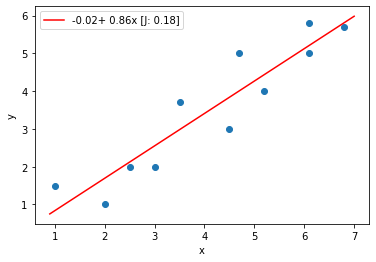

In [154]:
fig, ax = plt.subplots()
plt.xlabel("x")
plt.ylabel("y")

X = np.linspace(0.9,7,2)

# Fun√ß√£o linear correspondente
f = H(W[0],W[1])
# Avalia√ß√£o
loss = J(f)
# Exibir no gr√°fico
plt.plot(X,f(X),label=f"{float(W[0]): 3.2f}+{float(W[1]): 3.2f}x [J: {loss:.2f}]", color='r')
plt.legend()
# Mostrar dados para compara√ß√£o
plt.scatter(x,y);

In [155]:
# Teste de otimalidade da solu√ß√£o: norma do gradiente para solu√ß√£o acima

np.linalg.norm(grad_J(W[0],W[1]))

4.3702415423881166e-15

A solu√ß√£o acia √© muito pr√≥xima a encontrada pelo m√©todo do gradiente √© poss√≠vel. Isso n√£o √© coincidental: para o regressor com fun√ß√£o de avalia√ß√£o quadr√°tica, o problema de otimiza√ß√£o √© convexo, o que faz com que s√≥ exista um √≥timo local. Ademais, o algoritmo converge rapidamente para tal √≥timo, como discutimos antes. √â importante salientar que tais propriedades **n√£o se estendem para problemas mais complexos**. Neles, **o m√©todo do gradiente pode n√£o convergir, e quando converge pode obter uma solu√ß√£o sub√≥tima de baixa qualidade**.

## Regressor polinomial e regressor linear multivariado

Vamos repetir o exerc√≠cio assumindo agora uma classe de hip√≥teses mais expressiva:

$$
\mathcal{H} = \{ b + w_1 x + w_2 x^2 + w_3 x^3 | (b,w_1,w_2,w_3) \in \mathbb{R}^4 \}
$$

A classe de hip√≥teses acima √© equivalente a uma fun√ß√£o linear no **espa√ßo de atributos** $x' = (1,x,x^2,x^3)$. Para esse espa√ßo de entrada, a classe de hip√≥teses acima √© equivalente a $f(x)=\sum_{j=0} w_j x'_j$. As derivadas s√£o portanto obtidas de maneira an√°loga:

$$
\frac{\partial J(\sum_j w_jx')}{\partial w_j} = \frac{1}{N} \sum_{i=1}^N (f(x_i')-y_i)x_i' 
$$

In [18]:
H2 = lambda w: lambda x: np.inner(w,x)

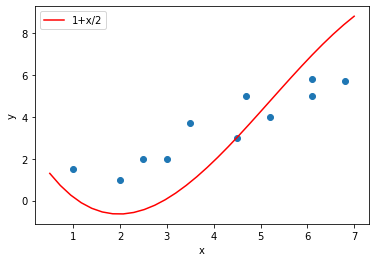

In [160]:
# Exemplo de hip√≥tese: 3 - 4x - 1.25x**2 - 0.08x**3
f_ex2 = H2(np.array([3,-4,1.25,-0.08]))

# Espa√ßo de entrada original
X = np.linspace(0.5,7,30)

# Espa√ßo de entrada aumentado (espa√ßo de atributos)
Xp = np.array([np.ones(X.shape), X, X**2, X**3])

# Exibir fun√ß√£o
plt.plot(X, f_ex2(Xp.T), c="r",label="1+x/2")
plt.legend()

# Exibir dados
plt.scatter(x,y);

# Nomear eixos
plt.xlabel("x");
plt.ylabel("y");

### Autodiferenciadores

Arcabou√ßos como [TensorFlow](https://www.tensorflow.org) e PyTorch prov√™m diversas facilidades para realizar aprendizado de m√°quina de maneira eficiente. Uma das facilidades consiste em obter o gradiente de maneira autom√°tica.

Vamos usar o TensorFlow para obter o gradiente do regressor polinomial. 

*Se voc√™ n√£o conseguir instalar a biblioteca ou tiver problemas em utiliz√°-la voc√™ pode usar o [Google Collaboratory](https://colab.research.google.com). Lembre-se de logar usando sua conta USP para ter acesso a mais recursos computacionais.*

In [20]:
# Primeiros importamos a biblioteca

import tensorflow as tf # se isso falhar, tente fechar o jupyter, ativar o ambiente (conda activate duckietown) e abr√≠-lo novamente 

In [356]:
# Vari√°veis s√£o usadas para declarar par√¢metros do modelo

#W = tf.Variable(np.random.randn(4), name="weights") # gera par√¢metros aleatoriamente
W = tf.Variable(np.array([3,-4,1.25,-0.08]), name="weights") # gera par√¢metros com valores iniciais dados

# Define o modelo
def linear_regression(x):
    return tf.tensordot(x, W, axes=1)

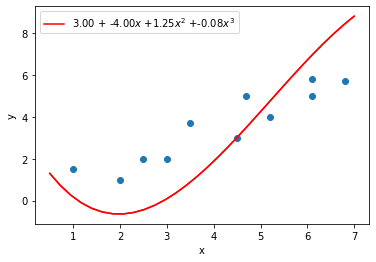

In [357]:
# Vamos usar o modelo inicial para predizer a sa√≠da
y_pred = linear_regression(Xp.T)

# Vamos visualizar o resultado
plt.scatter(x,y);
plt.plot(X,y_pred, 'r');
w = W.numpy()
plt.plot(X,y_pred, 'r', label=f'{w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();

In [358]:
# Fun√ß√£o de avalia√ß√£o
def mean_square_error(y_pred, y_true):
    return tf.reduce_sum(tf.square(y_pred-y_true)) / (2 * N)

Vamos calcular o custo dado pela fun√ß√£o de avalia√ß√£o

In [359]:
# Espa√ßo de atributos (espa√ßo de entrada aumentado)
xx = np.array([np.ones(x.size), x, x**2, x**3]).T

# Computa erro no conjunto de dados
custo = mean_square_error( linear_regression(xx), y )

print('Custo:', float(custo))

Custo: 1.7031282758909063


Vamos otimizar os par√¢metros pelo m√©todo da descida do gradiente

In [360]:
# Hiperpar√¢metros

√©pocas = 1000 # no de √©pocas

alpha = 0.00005 # taxa de aprendizado - precisamos usar uma taxa pequena pois o custo cresce rapidamente para modelos inacurados

for k in range(√©pocas):
    
    with tf.GradientTape() as g: # prepara as vari√°veis a serem atualizadas (W, no nosso caso)

        # Calcule a sa√≠da de acordo com o modelo atual
        y_pred = linear_regression(xx)

        # Calcule o custo das predi√ß√µes
        custo = mean_square_error(y_pred, y)

        # Compute o gradiente baeado no custo
        gradientes = g.gradient(custo, [W])
        
        # Adjust weights
        W.assign_sub(gradientes[0]*alpha)      
                
        # Progresso
        if k % 50 == 0:
            print(f"√âpoca: {k} \t Custo: {custo.numpy()}")
            
print(f"√âpoca: {k} \t Custo: {custo.numpy()}")

√âpoca 0: Custo: 1.7031282758909063
√âpoca 50: Custo: 1.3099166871335564
√âpoca 100: Custo: 1.2325232618534765
√âpoca 150: Custo: 1.161704046859576
√âpoca 200: Custo: 1.0968987454071082
√âpoca 250: Custo: 1.0375948151107717
√âpoca 300: Custo: 0.9833233978151044
√âpoca 350: Custo: 0.9336555963641854
√âpoca 400: Custo: 0.8881990687042702
√âpoca 450: Custo: 0.8465949122728659
√âpoca 500: Custo: 0.8085148139330186
√âpoca 550: Custo: 0.7736584428202022
√âpoca 600: Custo: 0.7417510653982974
√âpoca 650: Custo: 0.7125413637855902
√âpoca 700: Custo: 0.6857994400260428
√âpoca 750: Custo: 0.6613149904575878
√âpoca 800: Custo: 0.6388956356799842
√âpoca 850: Custo: 0.6183653928604088
√âpoca 900: Custo: 0.5995632782452728
√âpoca 950: Custo: 0.5823420287806947
√âpoca 999: Custo: 0.5668690773082862


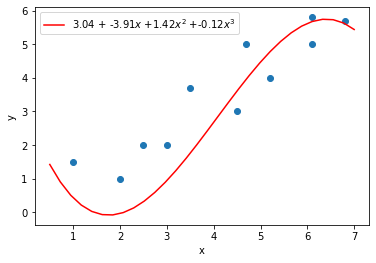

In [361]:
# Vamos usar o modelo aprendido para predizer a sa√≠da...
y_pred = linear_regression(Xp.T)

# ... e visualizar o resultado
plt.scatter(x,y);
w = W.numpy()
plt.plot(X,y_pred, 'r', label=f'{w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();

## Fun√ß√£o de ativa√ß√£o

Um dos problemas do regressor polinomial √© que sua sa√≠da cresce rapidamente. Vamos assumir que sabemos que a fun√ß√£o geradora dos dados nunca produz inst√¢ncias fora do intervalo $y \in [0,10]$, e portanto queremos *achatar* a sa√≠da do nosso modelo para que sua imagem se limite a tal intervalo. Uma maneira de condicionar a sa√≠da da fun√ß√£o mantendo-a diferenci√°vel √© usando uma *fun√ß√£o de ativa√ß√£o*, como por exemplo a fun√ß√£o log√≠stica:

$$
\mathrm{sigmoide}(x) = \frac{C}{1 + e^{a-bx}}
$$

cujos par√¢metros $C$, $a$ e $b$ ajustam a amplitude e a satura√ß√£o da fun√ß√£o

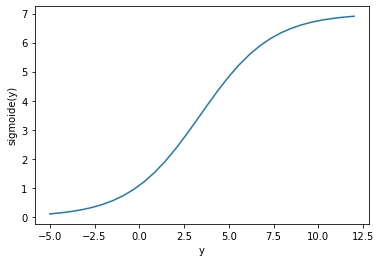

In [362]:
sigmoide = lambda x: 7/(1+np.exp(-0.5*x + 1.7))

y_sp = np.linspace(-5,12,30)

plt.plot(y_sp, sigmoide(y_sp));
plt.xlabel('y');
plt.ylabel('sigmoide(y)');

Vamos compor nosso regresso linear com a fun√ß√£o sigm√≥ide acima

In [424]:
W2 = tf.Variable(np.array([3,-4,1.25,-0.08])) # gera par√¢metros com valores iniciais dados
A = tf.Variable(np.array(1.5)) # gera par√¢metros com valores iniciais dados
B = tf.Variable(np.array(0.5)) # gera par√¢metros com valores iniciais dados
C = tf.Variable(np.array(7.0)) # gera par√¢metros com valores iniciais dados

# Define o novo modelo
def squashed_linear_regression(x):
    z = tf.tensordot(x, W2, axes=1)
    return C*tf.sigmoid(B*z-A) # equivalente a C/(1+tf.exp(A-B*z))    

Note que o resultado √© um fun√ß√£o n√£o-linear em rela√ß√£o aos par√¢metros, cujas derivadas n√£o s√£o t√£o simples de calcular. Por sorte, vamos deixar o TensorFlow calcul√°-las para n√≥s.

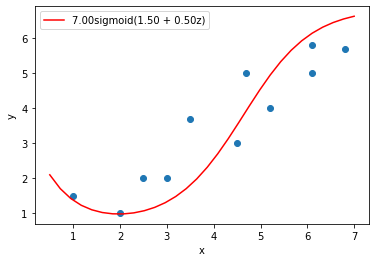

In [425]:
# Vamos usar o modelo inicial para predizer a sa√≠da
y_pred = squashed_linear_regression(Xp.T)

# Vamos visualizar o resultado
plt.scatter(x,y);
plt.plot(X,y_pred, 'r', label=f'{float(C):.2f}sigmoid({float(A):.2f} + {float(B):.2f}z)');
plt.xlabel('x');
plt.ylabel('y');
plt.legend();

In [426]:
# Computa erro no conjunto de dados
custo = mean_square_error( squashed_linear_regression(xx), y )

print('Custo:', float(custo))

Custo: 0.4282658758363506


In [427]:
# Vamos otimizar os par√¢metros

√©pocas = 1000 # no de √©pocas

alpha = 0.0001 # taxa de aprendizado - precisamos usar uma taxa pequena pois o custo cresce rapidamente para modelos inacurados

for k in range(√©pocas):
    
    with tf.GradientTape() as g: # prepara as vari√°veis a serem atualizadas (W, no nosso caso)

        # Calcule a sa√≠da de acordo com o modelo atual
        y_pred = squashed_linear_regression(xx)

        # Calcule o custo das predi√ß√µes
        custo = mean_square_error(y_pred, y)

        # Compute o gradiente baeado no custo
        gradientes = g.gradient(custo, [W2, A, B, C])
        
        # Adjust weights
        W2.assign_sub(gradientes[0]*alpha)      
        A.assign_sub(gradientes[1]*alpha)      
        B.assign_sub(gradientes[2]*alpha)      
        C.assign_sub(gradientes[3]*alpha)      

                
        # Progresso
        if k % 50 == 0:
            print(f"√âpoca: {k} \t Custo: {custo.numpy()}")
            
print(f"√âpoca: {k} \t Custo: {custo.numpy()}")

√âpoca: 0 	 Custo: 0.4282658758363506
√âpoca: 50 	 Custo: 0.38390892883100497
√âpoca: 100 	 Custo: 0.3725948175103206
√âpoca: 150 	 Custo: 0.36183691067084683
√âpoca: 200 	 Custo: 0.3516248494097218
√âpoca: 250 	 Custo: 0.3419469036454914
√âpoca: 300 	 Custo: 0.3327901219914539
√âpoca: 350 	 Custo: 0.3241404698267091
√âpoca: 400 	 Custo: 0.3159829592146482
√âpoca: 450 	 Custo: 0.3083017734534492
√âpoca: 500 	 Custo: 0.301080388218598
√âpoca: 550 	 Custo: 0.29430169050525434
√âpoca: 600 	 Custo: 0.28794809592115217
√âpoca: 650 	 Custo: 0.28200166433367757
√âpoca: 700 	 Custo: 0.27644421344518216
√âpoca: 750 	 Custo: 0.271257429559044
√âpoca: 800 	 Custo: 0.26642297460035463
√âpoca: 850 	 Custo: 0.26192258835957427
√âpoca: 900 	 Custo: 0.25773818492148454
√âpoca: 950 	 Custo: 0.25385194230989244
√âpoca: 999 	 Custo: 0.2503158560283082


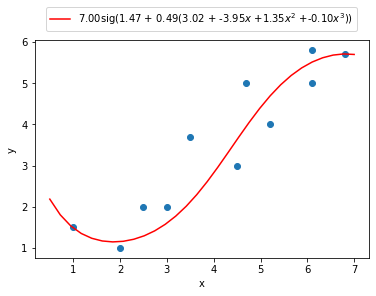

In [428]:
# Vamos usar o modelo aprendido para predizer a sa√≠da...
y_pred = squashed_linear_regression(Xp.T)

# ... e visualizar o resultado
plt.scatter(x,y);
w = W2.numpy()
plt.plot(X,y_pred, 'r', label=f'{float(C):.2f}sig({float(A):.2f} + {float(B):.2f}({w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$))');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();
plt.legend(bbox_to_anchor=(.5,1.1), loc="center");

### üí°Sua vez - Inicializa√ß√£o

O algoritmo de descida do gradiente √© muito sens√≠vel √† escolha dos valores iniciais para os par√¢metros. Nos experimentos acima, n√≥s inciamos o algoritmo com valores relativamente pr√≥ximos do √≥timo. Na pr√°tica, raramente sabemos uma boa inicializa√ß√£o dos par√¢metros.

- Modifique os valores para o n√∫mero de √©pocas e taxa de aprendizado para que o algoritmo obtenha um bom modelo. Reflita sobre a converg√™ncia do algoritmo (n√∫mero de √©pocas necess√°rio para bom desempenho) e sensibilidade √† taxa de aprendizado quandos os par√¢metros s√£o incialiados aleatoriamente.

- Execute o c√≥digo v√°rias vezes (portanto gerando diferentes inicializa√ß√µes aleat√≥rias dos par√¢metros) e repare em como o aprendizado √© afetado (custo ao t√©rmino do n√∫mero de √©pocas, taxa de aprendizado para converg√™ncia etc). Procure encontrar uma inicializa√ß√£o que leve a um desempenho muito insatisfat√≥rio e uma a um desempenho bom, quando os demais hiperpar√¢metros s√£o mantidos constantes (taxa de aprendizado, n√∫mero de √©pocas).

- Investigue o uso de heur√≠stica para taxa de aprendizado mais sofisticadas. Uma sugest√£o √© usar uma fun√ß√£o decrescete como:

$$
\alpha = \frac{\alpha_0}{1+C*k}
$$

onde $\alpha_0 \in (0,1)$ √© uma constante de ganho, ajustada pelo valor da taxa de aprendizada na primeira √©poca, $k$ √© a √©poca e $C$ √© uma constante que regula o decaimento da taxa de aprendizado. Valores sugeridos s√£o $\alpha_0 = 0.1$ e $C=0.05$

In [618]:
# Modelo criado com par√¢metros aleat√≥rios

w1 = tf.Variable(np.random.randn(4)) 
w2 = tf.Variable(np.random.randn(1)) 
w3 = tf.Variable(np.random.randn(1)) 
w4 = tf.Variable(np.random.randn(1)) 

# Define o novo modelo usando par√¢metros acima
def squashed_linear_regression2(x):
    z = tf.tensordot(x, w1, axes=1)
    return w4*tf.sigmoid(w3*z-w2) 

# Treino

√©pocas = 1000 # no de √©pocas precisa aumentar 

alpha = 0.001 # taxa de aprendizado pode ser aumentada pois a solu√ß√£o inicial est√° longe do √≥timo local

for k in range(√©pocas):
    
    with tf.GradientTape() as g: # prepara as vari√°veis a serem atualizadas (W, no nosso caso)
        
        #alpha = 0.1/(1+0.05*k) # descomente para usar uma taxa de aprendizado din√¢mica
        
        # Calcule a sa√≠da de acordo com o modelo atual
        y_pred = squashed_linear_regression2(xx)

        # Calcule o custo das predi√ß√µes
        custo = mean_square_error(y_pred, y)

        # Compute o gradiente baeado no custo
        gradientes = g.gradient(custo, [w1, w2, w3, w4])
        
        # Adjust weights
        w1.assign_sub(gradientes[0]*alpha)      
        w2.assign_sub(gradientes[1]*alpha)      
        w3.assign_sub(gradientes[2]*alpha)      
        w4.assign_sub(gradientes[3]*alpha)      

                
        # Progresso
        if k % 100 == 0:
            print(f"√âpoca: {k} \t Custo: {custo.numpy()}")
            
print(f"√âpoca: {k} \t Custo: {custo.numpy()}")

√âpoca: 0 	 Custo: 9.808282181940134
√âpoca: 100 	 Custo: 8.310118352017266
√âpoca: 200 	 Custo: 7.07349502035537
√âpoca: 300 	 Custo: 6.0525595818858795
√âpoca: 400 	 Custo: 5.209653660615923
√âpoca: 500 	 Custo: 4.513766398934981
√âpoca: 600 	 Custo: 3.9393127700790598
√âpoca: 700 	 Custo: 3.4651576219118767
√âpoca: 800 	 Custo: 3.0738285501316174
√âpoca: 900 	 Custo: 2.7508760285249463
√âpoca: 999 	 Custo: 2.4867698334099266


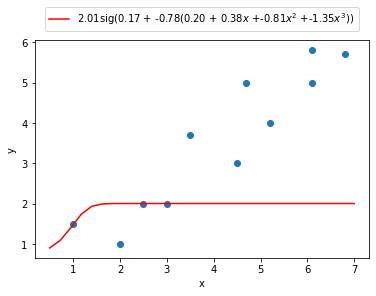

In [619]:
# Vamos usar o modelo aprendido para predizer a sa√≠da...
y_pred = squashed_linear_regression2(Xp.T)

# ... e visualizar o resultado
plt.scatter(x,y);
w = w1.numpy()
plt.plot(X,y_pred, 'r', label=f'{float(w4):.2f}sig({float(w2):.2f} + {float(w3):.2f}({w[0]:.2f} + {w[1]:.2f}$x$ +{w[2]:.2f}$x^2$ +{w[3]:.2f}$x^3$))');
plt.ylabel('y');
plt.xlabel('x');
plt.legend();
plt.legend(bbox_to_anchor=(.5,1.1), loc="center");

## Redes neurais

O modelo que constru√≠mos para a regressor polinomial (ou linear multivariado) com sa√≠da sigmoide exemplifica o conceito de unidade computacional em uma rede neural.

$$
\mathrm{neuronio}(x) = \sigma( w^t \cdot x + b ) \, ,
$$

onde $\sigma$ √© uma fun√ß√£o de ativa√ß√£o como a fun√ß√£o sigmoide, $w$ s√£o os pesos e $b$ √© o vi√©s ou constante. Note que $x$ e $w$ s√£o vetores em $\mathbb{R}^d$ para alguma dimens√£o $d$. Uma camada de uma rede neural √© composta por um conjunto de neur√¥nios, que compartilham da mesma entrada $x$, mas possuem par√¢metros $w$ e $b$ (possivelmente) distintos.

<figure style="text-align: center">
    <img src="img/neuronio.png" width=400>
</figure>

Especificar uma rede neural com v√°rios neur√¥nios por camada e v√°rias camadas √© uma tarefa laboriosa e sujeita a erros.
Por isso, o TensorFlow, assim como outros pacotes, possuem fun√ß√µes para facilitar e automatizar a cria√ß√£o de modelos complexos a partir da composi√ß√£o de fun√ß√µes pr√©-especificadas. A mais simples dela, chamada de *camada densa*, corresponde exatamente ao neur√¥nio definido acima.

Vamos recriar o modelo anterior usando as facilidades da interface do TensorFlow

In [624]:
# Primeiro criamos uma camada de entrada, para representar o vetor de entrada
entrada = tf.keras.Input(shape=(4,)) # dimens√£o 4 correspondente √† dimens√£o de nosso espa√ßo de atributos (1,x,x**2,x**3)

# Depois criamos a camada intermedi√°ria, que computa sigmoide(W*x + b), com x sendo a entrada
z = tf.keras.layers.Dense(1, activation=tf.sigmoid)(entrada) # camada densa com 1 neur√¥nio e fun√ß√£o de ativa√ß√£o log√≠stica

# Por fim, criamos a camada de sa√≠da, que no nosso caso √© apenas uma fun√ß√£o linear
sa√≠da = tf.keras.layers.Dense(1)(z) # camada densa com 1 neur√¥nio e fun√ß√£o de ativa√ß√£o linear

# O modelo encapsula a composi√ß√£o de fun√ß√µes e recorda as camadas de entrada e sa√≠da, necess√°rio para o aprendizado
modelo = tf.keras.Model(inputs=entrada, outputs=sa√≠da)

# Agora compilamos o modelo para produzir as derivadas com rela√ß√£o a 
# uma fun√ß√£o de avalia√ß√£o (loss) e um algoritmo de aprendizado 

alpha = 0.001 # taxa de aprendizado

modelo.compile(
        optimizer=tf.keras.optimizers.SGD(alpha), # SGD (Stochastic Gradient Descent)
        loss="mse" # mse - mean squared error, usada para c√°lculo do gradiente
) 

In [625]:
# Otimizamos os par√¢metros com o m√©todo fit
history = modelo.fit(xx,y, epochs=10000, verbose=0);

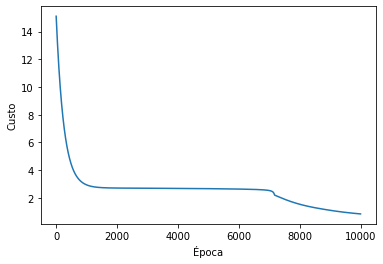

In [626]:
# Vamos analisar o resultado do aprendizado

plt.plot(history.history['loss']);
plt.xlabel('√âpoca');
plt.ylabel('Custo');

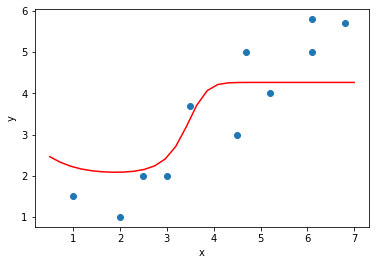

In [627]:
# Vamos usar o modelo aprendido para prever os dados...

y_pred = modelo.predict(Xp.T)

# ...e visualizar o resultado

plt.scatter(x,y);

plt.plot(X, y_pred, 'r')
plt.ylabel('y');
plt.xlabel('x');

### Uma rede mais complexa

Vamos agora construir uma rede neural complexa para prever os dados. A fun√ß√£o [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) facilita a composi√ß√£o de modelos de v√°rias camadas.

In [652]:
modelo2 = tf.keras.Sequential([
      tf.keras.Input(shape=(4,)), # camada de entrada
      tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
      tf.keras.layers.Dense(4, activation=tf.nn.relu), # camada oculta com 4 neur√¥nios e fun√ß√£o de ativa√ß√£o ReLu
      tf.keras.layers.Dense(1) # Camada de sa√≠da
    ])

TensorFlow conta com [diversos otimizadores](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) al√©m de descida do gradiente. Os outros otimizadores diferem em como realizam a atualiza√ß√£o dos pesos e como usam a taxa de aprendizado, e s√£o em geral mais efetivos que o m√©todo de descida de gradiente padr√£o.

Vamos usar o otimimzador conhecido como Adam.

In [653]:
modelo2.compile(loss='mse', optimizer='Adam')

In [654]:
# Otimizamos os par√¢metros com o m√©todo fit
history = modelo2.fit(xx,y, epochs=1000, verbose=0);

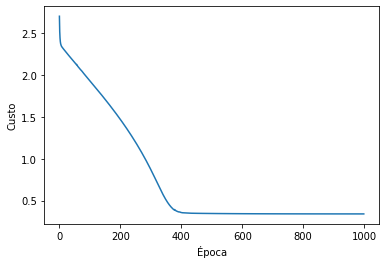

In [655]:
# Vamos analisar o resultado do aprendizado

plt.plot(history.history['loss']);
plt.xlabel('√âpoca');
plt.ylabel('Custo');

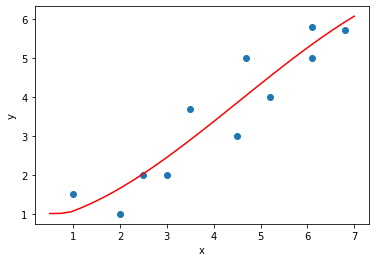

In [656]:
# Vamos usar o modelo aprendido para prever os dados...

y_pred = modelo2.predict(Xp.T)

# ...e visualizar o resultado

plt.scatter(x,y);

plt.plot(X, y_pred, 'r')
plt.ylabel('y');
plt.xlabel('x');

### üí°Sua vez 

Modifique o c√≥digo acima para investigar o efeito da escolha de arquitetura (n√∫mero de neur√¥nios por camada, n√∫mero de camadas, fun√ß√µes de ativa√ß√£o em cada camada) na fun√ß√£o aprendida.

- Qual o efeito do aumento de complexidade da rede na fun√ß√£o obtida?
- Qual o efeito do aumento de complexidade da rede no aprendizado (converg√™ncia)?